In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [9]:
# Load the data
data = pd.read_csv('test-data/ma_plot_testdata_4.csv', index_col=0)
data = data.apply(np.log10)

In [10]:
def scatter_density(x, y, **kwargs):
    kwargs.pop('color')
    # Calculate the point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, cmap="jet", **kwargs)

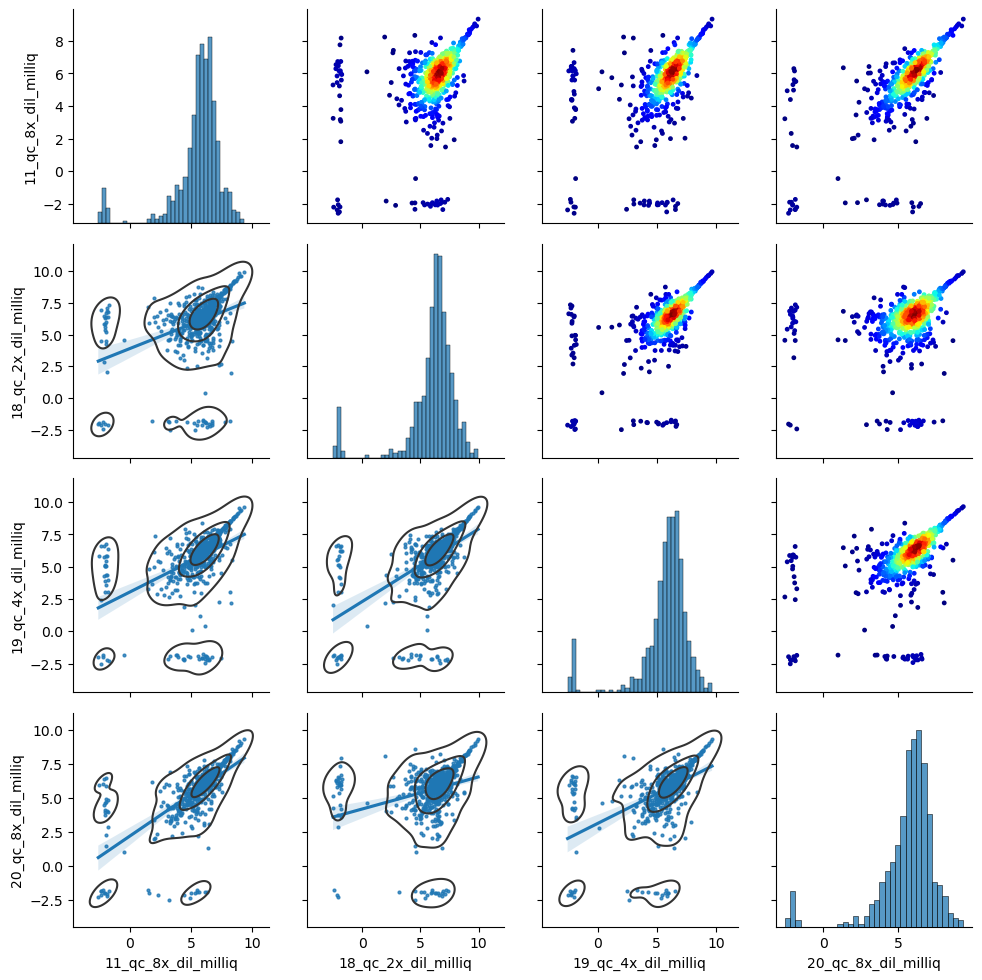

In [11]:
g = sns.PairGrid(data)
g.map_lower(sns.regplot, scatter_kws=dict(s=4))
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.map_upper(scatter_density, s=6)
g.map_diag(sns.histplot)
plt.show()